# CIFAR-10
-  60000 32x32 colour images 
- 10 classes
- with 6000 images per class. 
- 50000 training images and 10000 test images

https://www.cs.toronto.edu/~kriz/cifar.html

In [1]:
import keras
from keras.datasets import cifar10
import numpy as np

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


In [2]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [3]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


In [4]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint 
from fnn_helper import PlotLosses

In [5]:
def get_model_2():
    p=0.25
    model = Sequential()
    model.add(Convolution2D(filters=6, strides=1, kernel_size=6, padding='same',input_shape=(32,32,3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(p))
    model.add(Convolution2D(filters=12, strides=2, kernel_size=5, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(p))
    model.add(Convolution2D(filters=24, strides=2, kernel_size=4, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(p))
    model.add(Flatten())
    model.add(Dense(200))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(p))
    model.add(Dense(10, activation='softmax'))
    return model
model = get_model_2()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 6)         654       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 6)         24        
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 6)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 12)        1812      
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 12)        48        
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 12)        0         
__________

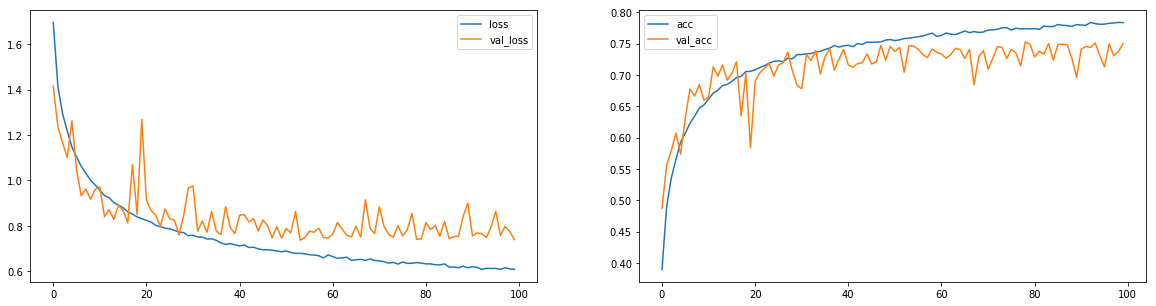

Epoch 00099: val_loss did not improve
45000/45000 [==============================] - 27s - loss: 0.6085 - acc: 0.7835 - val_loss: 0.7396 - val_acc: 0.7504


In [11]:
model_2 = get_model_2()
adam = optimizers.Adam(lr=0.001)
model_2.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='cnn2.cifar.hdf5', verbose=1, save_best_only=True)
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None, x_val=x_valid, y_val_categorical=y_valid)

model_2.fit(x_train, 
          y_train,
          epochs=100, batch_size=32, 
          #verbose=1, 
          validation_data=(x_valid, y_valid), 
          callbacks=[plot_losses, checkpointer],
         )

In [12]:
# Cargo los valores del modelo
model_2.load_weights('cnn2.cifar.hdf5')
score = model_2.evaluate(x_test, y_test, verbose=0)
print("loss: ", score[0])
print("accuracy: ", score[1])

loss:  0.764824894047
accuracy:  0.7376
